<a href="https://colab.research.google.com/github/Sidsag/AI-Lab/blob/main/RealTimeStockPricePredictionUsingTweetAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from warnings import filterwarnings
filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('/content/stock_data.csv')
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')
data.head()

There are 5791 rows and 2 columns


,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [ ]:
data.Sentiment.value_counts()

 1    3685
-1    2106
Name: Sentiment, dtype: int64

In [ ]:
wordList = list()
for i in range(len(data)):
    temp = data.Text[i].split()
    for k in temp:
        wordList.append(k)

In [ ]:
from collections import Counter
wordCounter = Counter(wordList)
countedWordDict = dict(wordCounter)
sortedWordDict = sorted(countedWordDict.items(),key = lambda x : x[1],reverse=True)
sortedWordDict[0:20]

[('the', 1796),
 ('to', 1668),
 ('a', 1280),
 ('on', 1032),
 ('of', 944),
 ('in', 891),
 ('AAP', 884),
 ('for', 868),
 ('and', 850),
 ('is', 811),
 ('-', 728),
 ('at', 541),
 ('this', 461),
 ('it', 454),
 ('I', 453),
 ('up', 357),
 ('user:', 340),
 ('from', 331),
 ('will', 330),
 ('be', 324)]

In [ ]:
num = 100
list1 = list()
list2 = list()
for i in range(num):
    list1.append(wordCounter.most_common(num)[i][0])
    list2.append(wordCounter.most_common(num)[i][1])

In [ ]:
fig2 = px.bar(x=list1,y=list2,color=list2)
fig2.update_traces(hovertemplate="Word:'%{x}' Counted: %{y}")
fig2.update_layout(title={"text":"Word Counts"},xaxis={"title":"Words"},yaxis={"title":"Count"})
fig2.show()

In [ ]:
import nltk
nltk.download("stopwords") 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

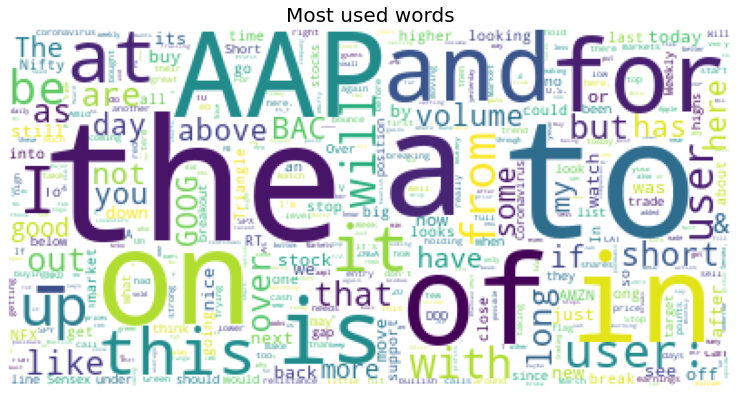

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

wordList2 = " ".join(wordList)
stopwordCloud = set(stopwords.words("english"))
wordcloud = WordCloud(stopwords=stopwordCloud,max_words=2000,background_color="white",min_font_size=3).generate_from_frequencies(countedWordDict)
plt.figure(figsize=[13,10])
plt.axis("off")
plt.title("Most used words",fontsize=20)
plt.imshow(wordcloud)
plt.show()